# Project Title - NYC Taxi Trip Data

This is the Dataset about the Taxi Trip in NYC. We will analyse the this data to know various Info from it using Numpy,Pandas and then visualize it using Mathplotlib and Seaborn. This is also a final project for Data Analysis with Python: Zero to Pandas from JovianAI. 

## Downloading the Dataset

Here we will download the Dataset form kaggle to Google Colab and then we'll proceed with basic data cleaning and prepration.

In [4]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [5]:
dataset_url = 'https://www.kaggle.com/datasets/neilclack/nyc-taxi-trip-data-google-public-data?select=taxi_trip_data.csv' 

In [6]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: casimirknight
Your Kaggle Key: ··········


100%|██████████| 422M/422M [00:18<00:00, 23.5MB/s]


The dataset has been downloaded and extracted.

In [7]:
data_file = './nyc-taxi-trip-data-google-public-data/taxi_trip_data.csv'

In [8]:
data_geo = './nyc-taxi-trip-data-google-public-data/taxi_zone_geo.csv'

Let us save and upload our work to Jovian before continuing.

In [9]:
project_name = "course-project-nyc-taxi" # change this (use lowercase letters and hyphens only)

In [10]:
!pip install jovian --upgrade -q

In [11]:
import jovian

In [12]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/deep3700/course-project-nyc-taxi


'https://jovian.ai/deep3700/course-project-nyc-taxi'

## Data Preparation and Cleaning





In [13]:
import numpy as np
import pandas as pd

In [14]:
df  = pd.read_csv(data_file)

In [15]:
df_geo = pd.read_csv(data_geo)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   vendor_id            int64  
 1   pickup_datetime      object 
 2   dropoff_datetime     object 
 3   passenger_count      int64  
 4   trip_distance        float64
 5   rate_code            int64  
 6   store_and_fwd_flag   object 
 7   payment_type         int64  
 8   fare_amount          float64
 9   extra                float64
 10  mta_tax              float64
 11  tip_amount           float64
 12  tolls_amount         float64
 13  imp_surcharge        float64
 14  total_amount         float64
 15  pickup_location_id   int64  
 16  dropoff_location_id  int64  
dtypes: float64(8), int64(6), object(3)
memory usage: 1.3+ GB


As datetime are datatype obejct. We'll have to covert them into datetime datatype

In [17]:
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)

In [18]:
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime )

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 17 columns):
 #   Column               Dtype         
---  ------               -----         
 0   vendor_id            int64         
 1   pickup_datetime      datetime64[ns]
 2   dropoff_datetime     datetime64[ns]
 3   passenger_count      int64         
 4   trip_distance        float64       
 5   rate_code            int64         
 6   store_and_fwd_flag   object        
 7   payment_type         int64         
 8   fare_amount          float64       
 9   extra                float64       
 10  mta_tax              float64       
 11  tip_amount           float64       
 12  tolls_amount         float64       
 13  imp_surcharge        float64       
 14  total_amount         float64       
 15  pickup_location_id   int64         
 16  dropoff_location_id  int64         
dtypes: datetime64[ns](2), float64(8), int64(6), object(1)
memory usage: 1.3+ GB


As we have converted the  datetime in datetime datatype we can get the day of the week or even hour from that time

In [36]:
df['pickup_hour'] = df.pickup_datetime.dt.hour

In [37]:
def time_day(x):
  if x in range(6,12):
    return 'Morning'
  elif x in range(12,16):
    return 'Afternoon'
  elif x in range(16,22):
    return 'Evening'
  else:
    return 'Late Night'


In [38]:
df['pickup_time_of_day']= df.pickup_datetime.dt.hour.apply(time_day)
df['dropoff_time_of_day']= df.dropoff_datetime.dt.hour.apply(time_day)


Now we have just take the hour out of the datetime and gave that hour to our function which will return what time of the day it is like if the hour is between 6AM to 12PM then it will return 'morning' and respectively.

In [69]:
df.sample(15)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,...,pickup_location_id,dropoff_location_id,pickup_area_name,dropoff_area_name,trip_duration,pickup_hour,pickup_time_of_day,dropoff_time_of_day,pickup_days,Dropoff_days
579069,1,2018-03-06 13:20:05,2018-03-06 13:37:24,1,7.10,1,N,1,21.5,0.0,...,264,264,NaN,NaN,17.0,13,Afternoon,Afternoon,Tuesday,Tuesday
8132967,2,2018-11-12 09:42:09,2018-11-12 10:32:57,1,11.69,1,N,1,44.5,0.0,...,138,68,LaGuardia Airport,East Chelsea,50.0,9,Morning,Morning,Monday,Monday
8360340,2,2018-03-22 20:19:29,2018-03-22 20:52:53,1,18.11,1,N,1,49.0,0.5,...,132,183,JFK Airport,Pelham Bay,33.0,20,Evening,Evening,Thursday,Thursday
6468885,2,2018-02-24 02:43:21,2018-02-24 03:15:48,2,9.41,1,N,1,32.5,0.5,...,255,228,Williamsburg (North Side),Sunset Park West,32.0,2,Late Night,Late Night,Saturday,Saturday
9961044,1,2018-02-12 22:30:00,2018-02-12 22:46:26,1,7.30,1,N,1,22.5,0.5,...,163,88,Midtown North,Financial District South,16.0,22,Late Night,Late Night,Monday,Monday
5326606,1,2018-05-29 07:19:13,2018-05-29 07:42:00,1,7.30,1,N,2,23.5,0.0,...,33,161,Brooklyn Heights,Midtown Center,22.0,7,Morning,Morning,Tuesday,Tuesday
7713832,1,2018-01-20 08:37:17,2018-01-20 08:54:29,1,7.60,1,N,1,23.0,0.0,...,263,223,Yorkville West,Steinway,17.0,8,Morning,Morning,Saturday,Saturday
2310166,1,2018-01-09 14:04:42,2018-01-09 14:39:47,1,5.80,1,N,1,27.0,0.0,...,13,239,Battery Park City,Upper West Side South,35.0,14,Afternoon,Afternoon,Tuesday,Tuesday
9444131,2,2018-03-14 01:45:24,2018-03-14 01:59:32,1,7.97,1,N,1,23.5,0.5,...,87,262,Financial District North,Yorkville East,14.0,1,Late Night,Late Night,Wednesday,Wednesday
2313976,1,2018-04-19 05:28:09,2018-04-19 05:53:20,1,7.00,1,N,2,25.0,0.5,...,249,89,West Village,Flatbush/Ditmas Park,25.0,5,Late Night,Late Night,Thursday,Thursday


In [70]:
 df.describe()

,vendor_id,passenger_count,trip_distance,rate_code,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,trip_duration,pickup_hour
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,1.614328e+00,1.602949e+00,8.849280e+00,1.201239e+00,1.189299e+00,3.165255e+01,3.383781e-01,4.819289e-01,5.598527e+00,2.137918e+00,2.978831e-01,4.051607e+01,1.535632e+02,1.481428e+02,3.530166e+01,1.378813e+01
std,5.146576e-01,1.245782e+00,5.882028e+00,1.250733e+00,4.339876e-01,1.606011e+02,5.512911e-01,1.207282e-01,4.840596e+00,3.750309e+00,3.406027e-02,1.611634e+02,6.076456e+01,7.574853e+01,8.385578e+01,6.253211e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-8.000000e+02,-8.000000e+01,-5.000000e-01,-3.224200e+02,-5.250000e+01,-3.000000e-01,-8.003000e+02,1.000000e+00,1.000000e+00,-7.044600e+04,0.000000e+00
25%,1.000000e+00,1.000000e+00,5.820000e+00,1.000000e+00,1.000000e+00,2.350000e+01,0.000000e+00,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,2.906000e+01,1.320000e+02,8.800000e+01,2.200000e+01,1.000000e+01
50%,2.000000e+00,1.000000e+00,8.480000e+00,1.000000e+00,1.000000e+00,2.850000e+01,0.000000e+00,5.000000e-01,5.560000e+00,0.000000e+00,3.000000e-01,3.730000e+01,1.380000e+02,1.420000e+02,3.000000e+01,1.400000e+01
75%,2.000000e+00,2.000000e+00,1.110000e+01,1.000000e+00,1.000000e+00,3.700000e+01,5.000000e-01,5.000000e-01,7.960000e+00,5.760000e+00,3.000000e-01,4.906000e+01,1.860000e+02,2.290000e+02,3.800000e+01,1.900000e+01
max,4.000000e+00,9.000000e+00,7.655760e+03,9.900000e+01,5.000000e+00,3.984600e+05,8.400000e+01,1.500000e+02,4.960000e+02,9.182500e+02,1.000000e+00,3.985220e+05,2.650000e+02,2.650000e+02,9.730000e+03,2.300000e+01


In [71]:
df.groupby('vendor_id').count()

,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,...,pickup_location_id,dropoff_location_id,pickup_area_name,dropoff_area_name,trip_duration,pickup_hour,pickup_time_of_day,dropoff_time_of_day,pickup_days,Dropoff_days
vendor_id,,,,,,,,,,,,,,,,,,,,,
1,3949867,3949867,3949867,3949867,3949867,3949867,3949867,3949867,3949867,3949867,...,3949867,3949867,3837058,3785305,3949867,3949867,3949867,3949867,3949867,3949867
2,6003561,6003561,6003561,6003561,6003561,6003561,6003561,6003561,6003561,6003561,...,6003561,6003561,5899384,5858298,6003561,6003561,6003561,6003561,6003561,6003561
4,46572,46572,46572,46572,46572,46572,46572,46572,46572,46572,...,46572,46572,46472,45851,46572,46572,46572,46572,46572,46572


Checking missing values for the 'df' Datafame


In [ ]:
df_geo.groupby('zone_name').head(10)

,zone_id,zone_name,borough,zone_geom
0,1,Newark Airport,EWR,"POLYGON((-74.1856319999999 40.6916479999999, -..."
1,3,Allerton/Pelham Gardens,Bronx,"POLYGON((-73.848596761 40.8716707849999, -73.8..."
2,18,Bedford Park,Bronx,"POLYGON((-73.8844286139999 40.8668003789999, -..."
3,20,Belmont,Bronx,"POLYGON((-73.8839239579998 40.8644177609999, -..."
4,31,Bronx Park,Bronx,"POLYGON((-73.8710017319999 40.8572767429999, -..."
...,...,...,...,...
258,206,Saint George/New Brighton,Staten Island,"POLYGON((-74.0825658580711 40.6483158193535, -..."
259,214,South Beach/Dongan Hills,Staten Island,"POLYGON((-74.085787808 40.5958840799999, -74.0..."
260,221,Stapleton,Staten Island,"POLYGON((-74.076017768 40.6377481049999, -74.0..."
261,245,West Brighton,Staten Island,"POLYGON((-74.0992883379999 40.640204723, -74.0..."


We can calculate trip duration from the dropoff and pickup time

In [24]:
df['trip_duration']  = (df.dropoff_datetime - df.pickup_datetime).astype('timedelta64[m]')

In [19]:
df

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,trip_duration
0,2,2018-03-29 13:37:13,2018-03-29 14:17:01,1,18.15,3,N,1,70.0,0.0,0.0,16.16,10.50,0.3,96.96,161,1,39.0
1,2,2018-03-29 13:37:18,2018-03-29 14:15:33,1,4.59,1,N,1,25.0,0.0,0.5,5.16,0.00,0.3,30.96,13,230,38.0
2,2,2018-03-29 13:26:57,2018-03-29 13:28:03,1,0.30,1,N,1,3.0,0.0,0.5,0.76,0.00,0.3,4.56,231,231,1.0
3,2,2018-03-29 13:07:48,2018-03-29 14:03:05,2,16.97,1,N,1,49.5,0.0,0.5,5.61,5.76,0.3,61.67,231,138,55.0
4,2,2018-03-29 14:19:11,2018-03-29 15:19:59,5,14.45,1,N,1,45.5,0.0,0.5,10.41,5.76,0.3,62.47,87,138,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,2,2018-03-29 12:16:01,2018-03-29 13:03:31,1,3.45,1,N,1,27.5,0.0,0.5,5.66,0.00,0.3,33.96,211,229,47.0
9999996,1,2018-03-29 12:26:25,2018-03-29 13:09:54,1,6.80,1,N,1,30.0,0.0,0.5,4.62,0.00,0.3,35.42,79,238,43.0
9999997,2,2018-03-29 12:22:12,2018-03-29 13:01:07,2,8.46,1,N,1,35.0,0.0,0.5,8.31,5.76,0.3,49.87,138,162,38.0
9999998,2,2018-03-29 13:57:40,2018-03-29 15:07:42,1,14.43,1,N,1,52.5,0.0,0.5,11.81,5.76,0.3,70.87,13,138,70.0


Also we can include the Area names according to the zone name in 'df_geo'

In [20]:
area_codes_df = df_geo[['zone_id','zone_name']]
 

Simple way is to map the zones_name to the ids in the 'df'
* First we want to convert the zone id and zone names into dictionary
* Then use map() function to map each name to the respective id

In [21]:
dict_area = dict(area_codes_df.values)


In [22]:
df['pickup_area_name'] = df['pickup_location_id'].map(dict_area)

In [23]:
df['dropoff_area_name'] = df['dropoff_location_id'].map(dict_area)

In [20]:
import jovian

In [21]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/deep3700/course-project-nyc-taxi


'https://jovian.ai/deep3700/course-project-nyc-taxi'

## Exploratory Analysis and Visualization
Here we'll begain with the Explotatory analysis and Visualization



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [25]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Vendor Id

 

*   Vendor_id
*  passenger_count

We'll analyse how manys trips each vendor did and how many passenger each had through NYC

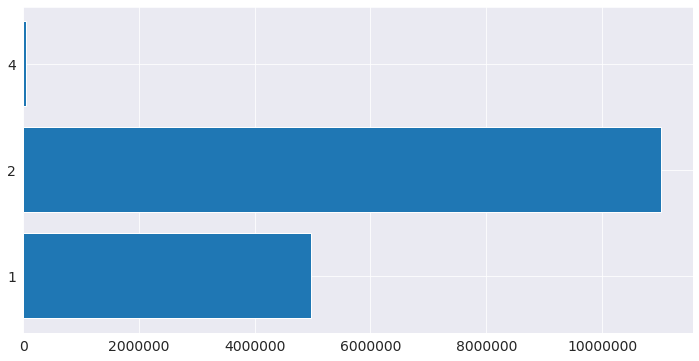

In [ ]:
vendor_count= df.groupby('vendor_id')[['passenger_count']].sum()
vendor_count.index
plt.barh( vendor_count.index.astype(str) , vendor_count.passenger_count  )
plt.ticklabel_format(axis= 'x' , style = 'plain')

The most of the passengers travel with vendor 2 then followed by vendor 1.
This could be due to more number of Taxis with vendor 2 

### Pickup time and Dropoff time

We can analyse the percentage to travel during the hour of the day


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Pickup by Hour')]

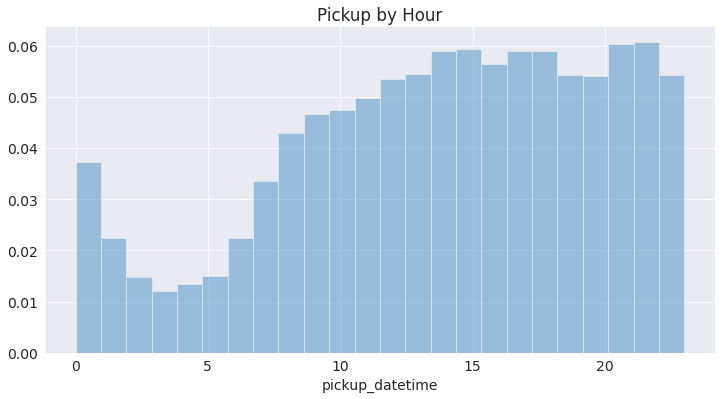

In [ ]:
sns.distplot(df.pickup_datetime.dt.hour , bins = 24 , kde = False , norm_hist = True).set(title = 'Pickup by Hour')

 - There is greater number of people starts to travel from 7AM and it goes to 12AM for that respective day.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Dropoff by Hour')]

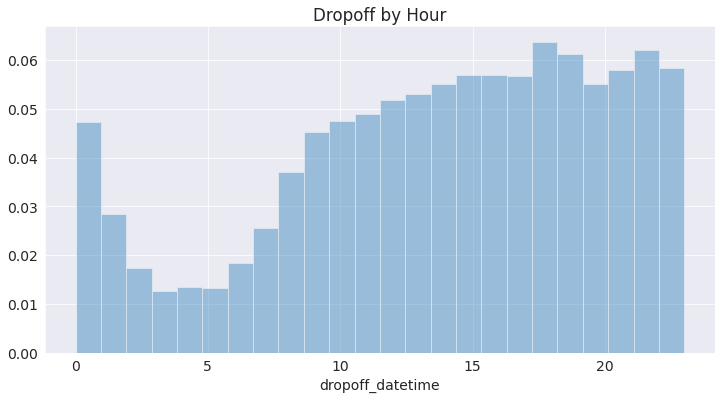

In [ ]:
sns.distplot(df.dropoff_datetime.dt.hour , bins = 24 , kde = False , norm_hist = True).set(title = 'Dropoff by Hour')

The percentage of travel increase from 9AM to increases even more till 10PM

We can check durin which time of the day more amount of passengers travel

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


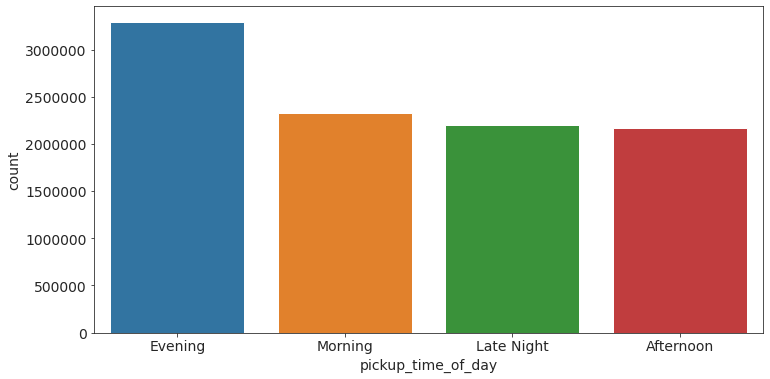

In [ ]:
pickup_plot = sns.countplot(df.pickup_time_of_day , order = df['pickup_time_of_day'].value_counts().index)
pickup_plot.ticklabel_format(axis = 'y' , style = 'plain')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


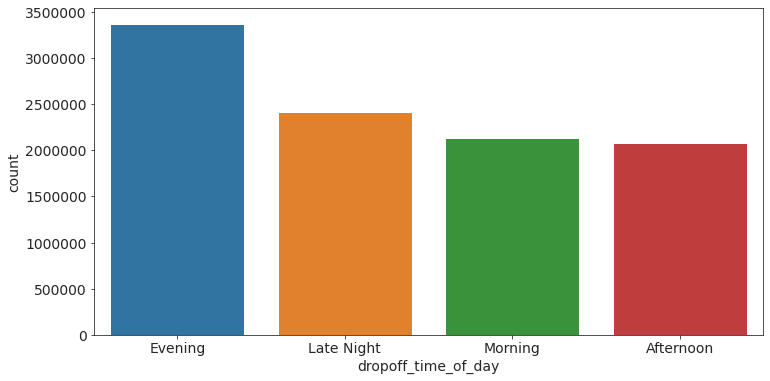

In [ ]:
dropoff_plot = sns.countplot(df.dropoff_time_of_day , order = df['dropoff_time_of_day'].value_counts().index)
dropoff_plot.ticklabel_format(axis = 'y' , style = 'plain')

Evening time sees the most amount of people travelling from Taxis


Let's analyse pickup datetime and check in which days of the week people like to take taxi

In [44]:
days = df.pickup_datetime.dt.day_name()

In [45]:
df['pickup_days']  = days

In [46]:
weekdays =  [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
passenger_count_per_day = df.groupby('pickup_days')[['passenger_count']].sum().reindex(weekdays)
passenger_count_per_day

,passenger_count
pickup_days,
Monday,2145284
Tuesday,2254621
Wednesday,2296277
Thursday,2635600
Friday,2540096
Saturday,2055844
Sunday,2101772


In [48]:
drop_days = df.dropoff_datetime.dt.day_name()

In [49]:
df['Dropoff_days'] = drop_days

In [50]:
weekdays =  [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
passenger_dropoff_count_per_day = df.groupby('Dropoff_days')[['passenger_count']].sum().reindex(weekdays)
passenger_dropoff_count_per_day

,passenger_count
Dropoff_days,
Monday,2144659
Tuesday,2248434
Wednesday,2287873
Thursday,2613836
Friday,2532619
Saturday,2069983
Sunday,2132090


In [ ]:
passenger_count_day_night = df.groupby('pickup_datetime')[['passenger_count']].sum()


In [ ]:
passenger_count_day = passenger_count_day_night.between_time('04:00:00' , '19:00:00')


In [ ]:
percent_of_passengers_day = (passenger_count_day.passenger_count.sum() / passenger_count_day_night.passenger_count.sum()) * 100
percent_of_passengers_day

64.37493909664272

We can see that aroud 64 % of passenges are tarvelling during the day

Now, we can check passenger count for the whole year

In [ ]:
months_pickup = df.pickup_datetime.dt.month_name()
months_dropoff = df.dropoff_datetime.dt.month_name()

In [ ]:
df['pickup_months']  = months_pickup
df['dropoff_months'] = months_dropoff

In [ ]:
arr_months = ['January','February' ,'March','April' ,'May','June' ,'July' ,'August',
         'September', 'October' , 'November', 'December']
passenger_count_month = df.groupby('pickup_months')[['passenger_count']].sum().reindex(arr_months)

passenger_count_month

,passenger_count
pickup_months,
January,1125261
February,1112937
March,2534215
April,1314805
May,1386561
June,1319670
July,1161265
August,1094778
September,1187063


* Similarly for Dropoff 

In [ ]:
passenger_dropoff_count_month = df.groupby('dropoff_months')[['passenger_count']].sum().reindex(arr_months)

passenger_dropoff_count_month

,passenger_count
dropoff_months,
January,1124910
February,1112799
March,2533503
April,1315783
May,1385913
June,1320131
July,1161058
August,1094981
September,1187313


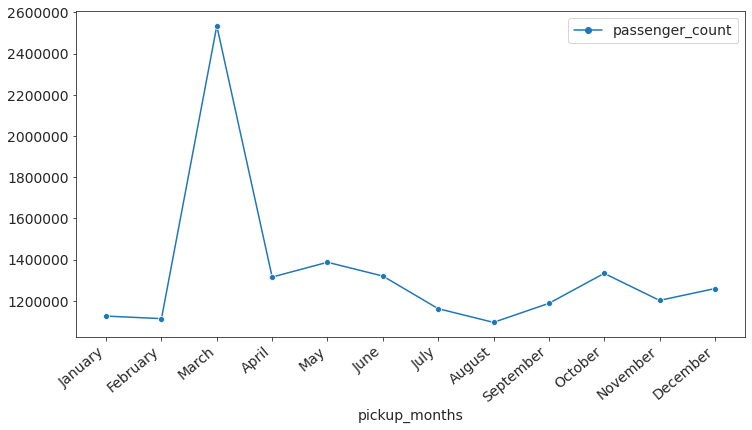

In [ ]:
sns.set_style('ticks')
line = sns.lineplot(  data = passenger_count_month , markers= True )
line.ticklabel_format( axis = 'y' , style = 'plain'  )
line.set_xticklabels(passenger_count_month.index, rotation = 40 , ha = 'right')
line


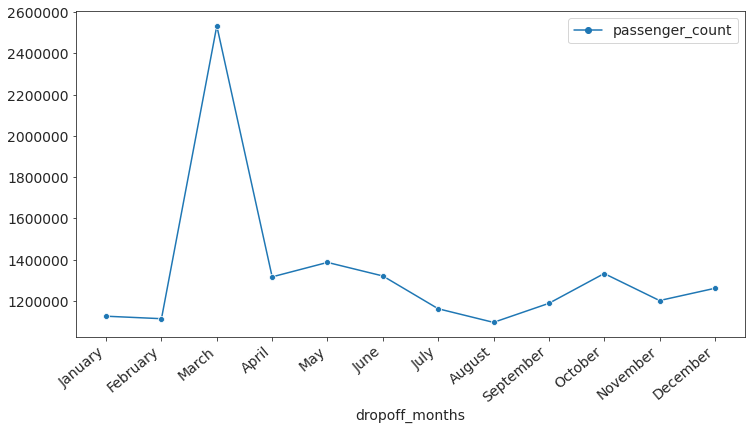

In [ ]:
sns.set_style('ticks')
line = sns.lineplot(  data = passenger_dropoff_count_month , markers= True )
line.ticklabel_format( axis = 'y' , style = 'plain'  )
line.set_xticklabels(passenger_dropoff_count_month.index, rotation = 40 , ha = 'right')
line

* From this we can see that there was a rise in travel in **March** 
This is due to more tourist like to travel to NYC in march 


### Trip distance

In [ ]:
df.trip_distance.value_counts()

0.00     278836
0.20      55942
8.90      49255
9.20      48740
9.10      48675
          ...  
81.03         1
44.53         1
45.41         1
43.12         1
50.83         1
Name: trip_distance, Length: 6502, dtype: int64

As we can see that there 278836 are 0 distance travelled trips 
There can be many reasons for this
* If the trip was canceld 
* The dropoff location couldn’t be tracked

### Payment Type

In [ ]:
df.payment_type.value_counts()

1    8255092
2    1623133
3      95464
4      26310
5          1
Name: payment_type, dtype: int64

In [ ]:
payment_count= df.groupby('payment_type')[['passenger_count']].count()
payment_count

,passenger_count
payment_type,
1,8255092
2,1623133
3,95464
4,26310
5,1


Most of the payment was done form Credit Card and then followed by Cash and No Charge.

No Charge payment type can be due to number of things
* Passenger would have used any coupon 
* There would have been an kind of discount



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


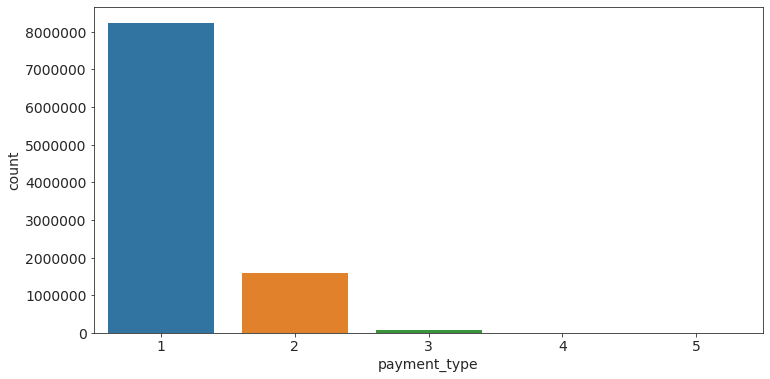

In [ ]:
payment_plot = sns.countplot(df.payment_type)
payment_plot.ticklabel_format(axis = 'y' ,style = 'plain')


### store and fwd_flag

This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server. Y= store and forward trip N= not a store and forward trip

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


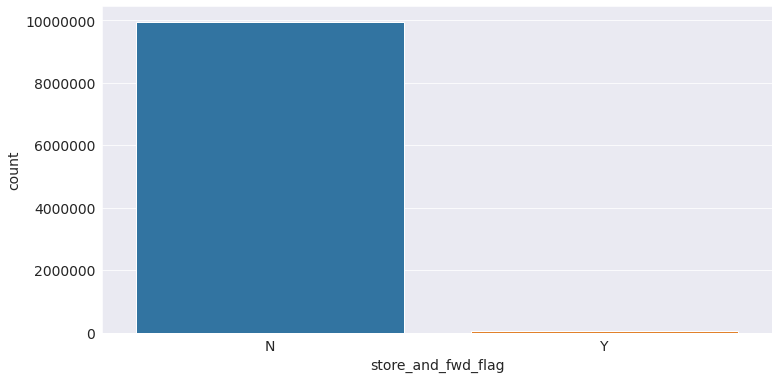

In [ ]:
store_and_fwd_plot = sns.countplot(df.store_and_fwd_flag)
store_and_fwd_plot.ticklabel_format(axis = 'y' , style = 'plain')


In [ ]:
df.store_and_fwd_flag.value_counts()

N    9946277
Y      53723
Name: store_and_fwd_flag, dtype: int64

Only .5% of total trips are Store and Forward Trips

### Extra

Miscellaneous extras and surcharges. Currently, this only includes the \$0.50 and \$1 rush hour and overnight charges.

In [ ]:
df.extra[df.extra  > 0 ] .value_counts()

0.50     3078251
1.00     1458870
4.50       85565
17.50        462
0.80         188
0.30         129
1.30          85
18.50         72
18.00         65
1.80          42
0.11          41
0.22          31
1.50          21
0.70           6
2.74           5
4.54           5
0.20           5
4.00           4
2.00           3
0.60           3
0.02           3
4.80           3
0.25           2
3.00           2
1.23           2
0.55           2
3.50           2
0.45           2
20.20          2
1.10           2
0.95           1
5.30           1
61.61          1
15.55          1
84.00          1
0.21           1
19.00          1
25.00          1
1.20           1
12.05          1
0.23           1
5.76           1
9.46           1
3.30           1
10.60          1
0.90           1
1.70           1
1.01           1
Name: extra, dtype: int64

Now we can plot the barplot for  
* 50 cents Standard State Surcharge Plus 

* $1.00 rush hour surcharge from 4pm to 8pm on weekdays 

* $4.50 for rush Hour surcharge for traips between manhattan and Jhon F Kennedy Airport.

* $17.50 Newark Surcharge for trips to Newark Airport


These are the standard charges, the rest are the same charges including some other charges like 30 cents for imporvement surcharge 

https://www1.nyc.gov/site/tlc/passengers/taxi-fare.page

In [ ]:
surcharges = df.extra[df.extra > 0].value_counts().to_frame().head(4)
surcharges

,extra
0.5,3078251
1.0,1458870
4.5,85565
17.5,462


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


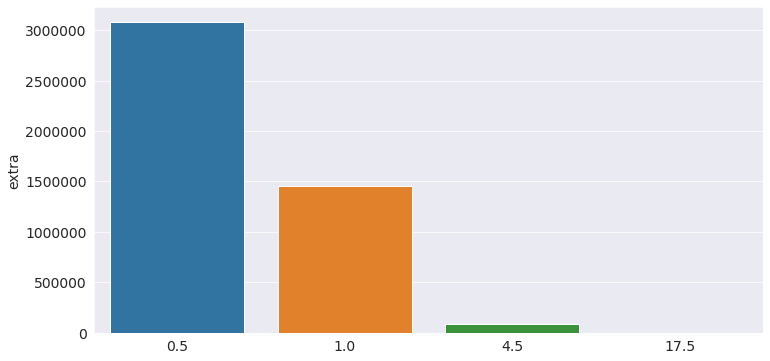

In [ ]:
barplot_extra = sns.barplot(surcharges.index , surcharges.extra)
barplot_extra.ticklabel_format(axis = 'y' , style = 'plain')


### Rate Code

In [ ]:
df.rate_code.unique()

array([ 3,  1,  5,  4,  2, 99,  6])

Rate Codes are 
* 1 = Standard rate
* 2 = JFK trips
* 3 = Newark trips
* 4 = Nassau or Westchester trips
* 5 = Negotiated fare
* 6 = Group ride

Rate code 99 could be some error in the data collection 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


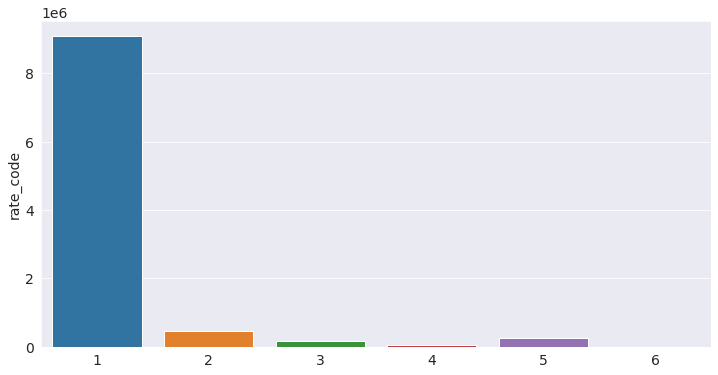

In [ ]:
rate_code_plot = df.rate_code[df.rate_code != 99 ].value_counts().to_frame()
sns.barplot(rate_code_plot.index , rate_code_plot.rate_code)


In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/deep3700/course-project-nyc-taxi


'https://jovian.ai/deep3700/course-project-nyc-taxi'

## Asking and Answering Questions





#### Q1: From which area there are most number of pickups and drops 

As we have mapped each pickup location/drop location to the respective area.
Let's continue to plot. 

We can group by the area name and then sum the passenger count for that area

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


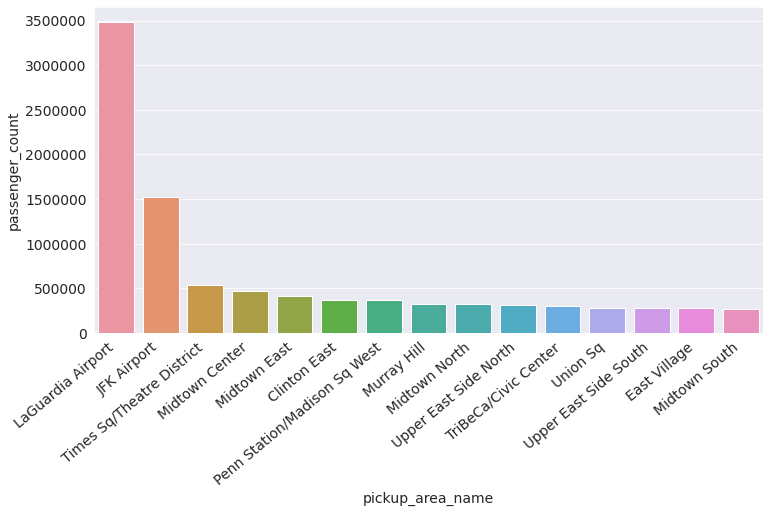

In [ ]:
pickup_area = df.groupby('pickup_area_name')[['passenger_count']].sum().sort_values('passenger_count' , ascending=False).head(15)
#pickup_area 
pickup_plot = sns.barplot(pickup_area.index , pickup_area.passenger_count)
pickup_plot.ticklabel_format(axis = 'y' , style= 'plain')
pickup_plot.set_xticklabels(pickup_area.index, rotation = 40 , ha = 'right');


Similarly can be done with the dropoff area

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


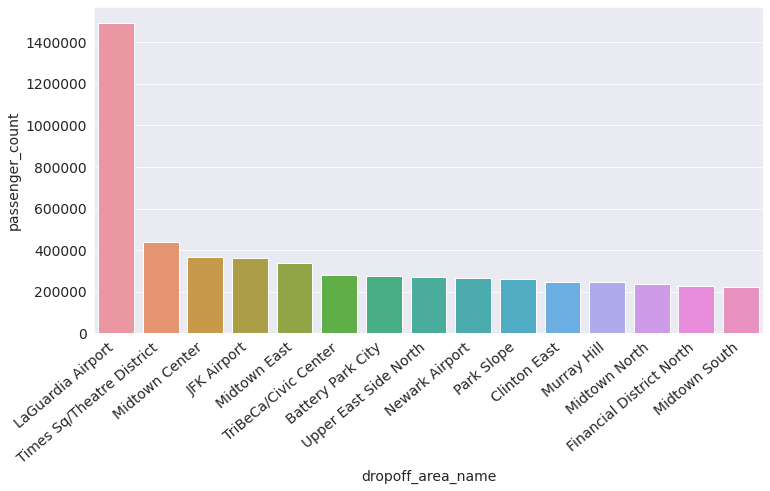

In [ ]:
dropoff_area = df.groupby('dropoff_area_name')[['passenger_count']].sum().sort_values('passenger_count' , ascending=False).head(15)
#pickup_area 
dropoff_plot = sns.barplot(dropoff_area.index , dropoff_area.passenger_count)
dropoff_plot.ticklabel_format(axis = 'y' , style= 'plain')
dropoff_plot.set_xticklabels(dropoff_area.index, rotation = 40 , ha = 'right');

LaGuardia sees the most amount of people

***As LaGuardia Airport seems be with most pickups and dropoffs.***
**Let's check What is the 24 hour taxi traffic pattern like.** 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Pickup by Hour')]

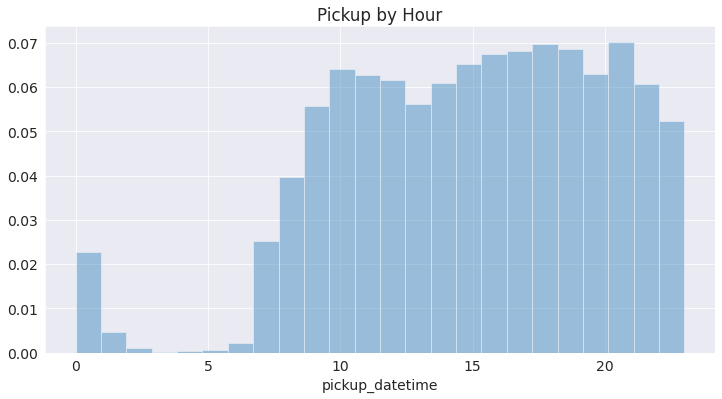

In [ ]:
time_LaGuardia = df.pickup_datetime[df.pickup_area_name == 'LaGuardia Airport'].to_frame()
sns.distplot(time_LaGuardia.pickup_datetime.dt.hour , bins = 24 , kde = False , norm_hist = True).set(title = 'Pickup by Hour')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Dropoff by Hour')]

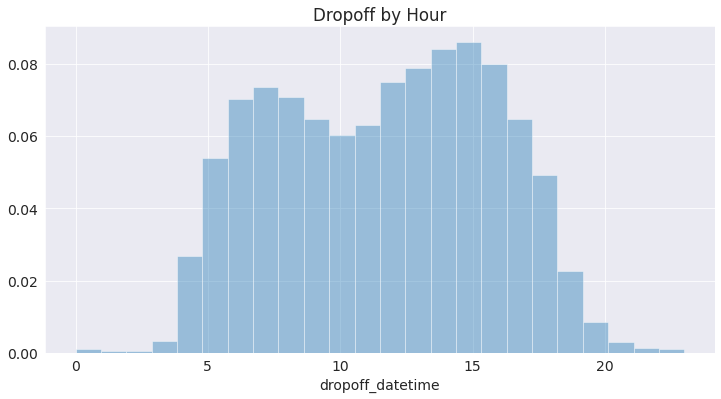

In [ ]:
dropoff_time_LaGuardia = df.dropoff_datetime[df.dropoff_area_name == 'LaGuardia Airport'].to_frame()
sns.distplot(dropoff_time_LaGuardia.dropoff_datetime.dt.hour , bins = 24 , kde = False , norm_hist = True).set(title = 'Dropoff by Hour')

* Pickup from LaGuardia goes round the clock and sees only a drop for 5 Hours
* Dropoff are sees it's first peak during 8AM then then next peak at 3PM




#### Q2: Top 15 areas from which the most ammount of revenue was earned.





Now, we can check the most amount of revenue earned from which of the areas

In [ ]:
pickup_earn_area = df.groupby('pickup_area_name')[['total_amount']].sum()

In [ ]:
pickup_earn_area.sort_values(by = 'total_amount' ,ascending = False).head(15)

,total_amount
pickup_area_name,
LaGuardia Airport,99880238.79
JFK Airport,53948990.24
Times Sq/Theatre District,13856629.35
Midtown Center,11536590.74
Midtown East,10054280.33
Clinton East,8491787.98
Penn Station/Madison Sq West,8382110.76
Midtown North,8161649.04
Murray Hill,7787963.27


In [ ]:
dropoff_earn_area = df.groupby('dropoff_area_name')[['total_amount']].sum()
dropoff_earn_area.sort_values(by = 'total_amount' , ascending = False).head(15)

,total_amount
dropoff_area_name,
LaGuardia Airport,42839952.52
Newark Airport,16227276.71
JFK Airport,12949772.26
Times Sq/Theatre District,11287499.15
Midtown Center,9285351.48
Midtown East,8151801.47
Park Slope,6962206.75
TriBeCa/Civic Center,6029965.02
Battery Park City,5948176.53


In [ ]:
df_add = pickup_earn_area.add(dropoff_earn_area , fill_value= 0 )
net_total= df_add.sort_values( by = 'total_amount' , ascending = False).head(15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


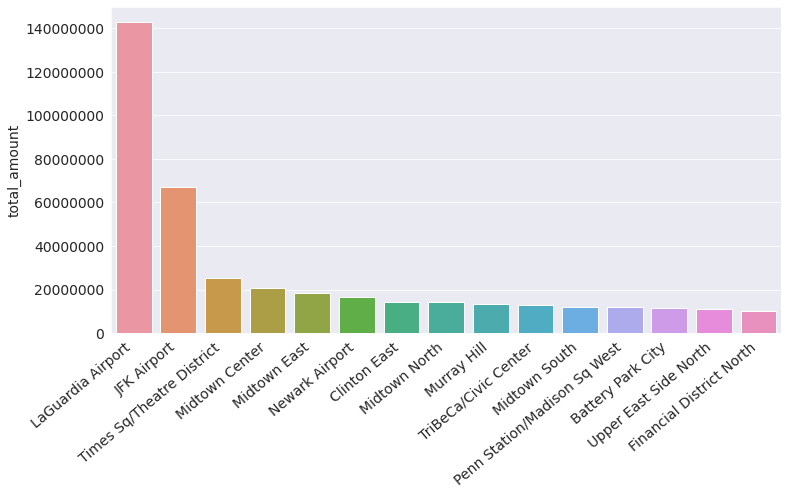

In [ ]:
ax = sns.barplot(net_total.index , net_total.total_amount)
ax.ticklabel_format(axis = 'y' , style= 'plain')
ax.set_xticklabels(net_total.index, rotation = 40 , ha = 'right');

As the most picksups and dropoff area form LaGuardia Airport the most amount of revenue is also Earned from LaGuardia and followed by JFK Airport

Now  have a look that how much each vendor earned in total
* From start we know there are 3 vendor 

In [ ]:
new_df = df.groupby(['vendor_id' , 'pickup_area_name'] ,  as_index = False)[['total_amount']].sum()



* Seperate each vendor to each dataframe 
* Then take first 10 for each vendor 
* And display the revenue earned for each vendor on a catplot 

In [ ]:
vendor1 = new_df[new_df['vendor_id']==1].sort_values(by = 'total_amount', ascending = False).head(10)
vendor2 = new_df[new_df['vendor_id']==2].sort_values(by = 'total_amount', ascending = False).head(10)
vendor4 = new_df[new_df['vendor_id']==4].sort_values(by = 'total_amount', ascending = False).head(10)

In [ ]:
vendor_plot = pd.concat([vendor1 , vendor2 , vendor4] , ignore_index = True)

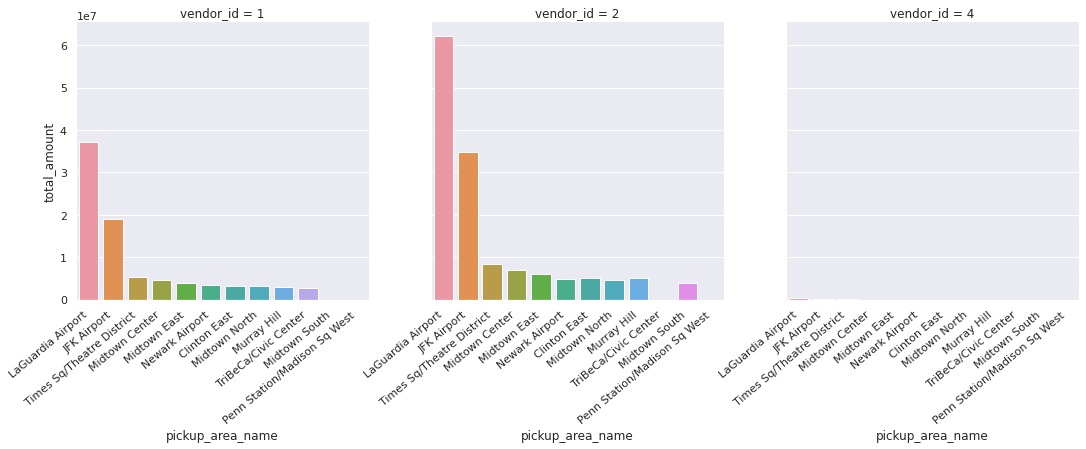

In [ ]:
vendor_plot
ax = sns.catplot( data = vendor_plot , x='pickup_area_name' , y = 'total_amount' , col = 'vendor_id' , kind = 'bar' )
ax.set_xticklabels(net_total.index, rotation = 40 , ha = 'right');



The majority taxi are of Vendor 1 and 2.
* And the most amout of Fare collected for both is from LaGuardia Airport and JFK Airport

---



#### Q3: Checking ralation of people tarvelling in the taxi and the amount of tips given.

We can group each passenger and the maen tips given

In [ ]:
pickup_tips = df.groupby('passenger_count', as_index = False  )[['tip_amount']].mean()

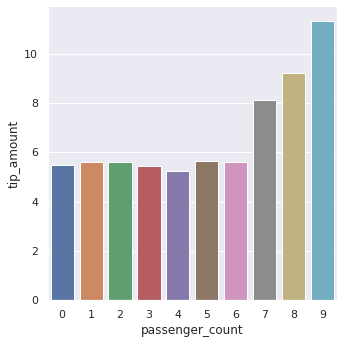

In [ ]:
sns.catplot ( data= pickup_tips , x = 'passenger_count' , y = 'tip_amount' , kind = 'bar' )

Mean tip amount was higher for passengers greater than 6 about 8.1 to 9.7.
And rest of the number passenger tip amount are in the same range 
 

#### Q4: The Rate code applied on a trip and the mean distance covered 

In [90]:
mean_distance = df.groupby('rate_code', as_index = False  )[['trip_distance']].mean()

In [91]:
mean_distance

,rate_code,trip_distance
0,1,8.271851
1,2,16.915471
2,3,17.701575
3,4,19.955646
4,5,7.058511
5,6,1.312251
6,99,0.146407


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


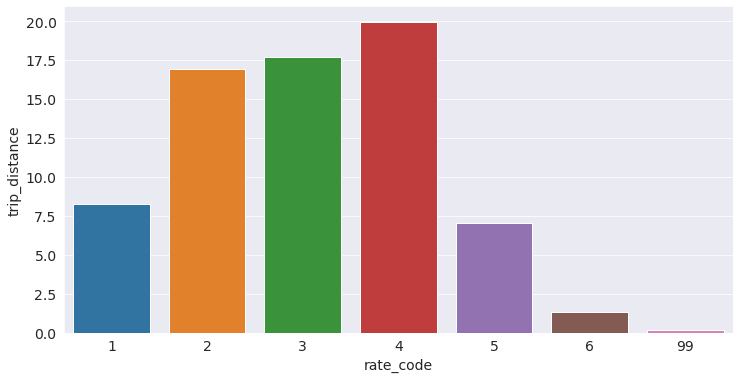

In [93]:
sns.barplot(mean_distance.rate_code, mean_distance.trip_distance)

2 = JFK 3 = Newark 4 = Nassau 


*   Sees greater amount mean of trip distance covered 




#### Q5: Let's check the Trip duration during the day 



*   Let's check duration during  24 hour 



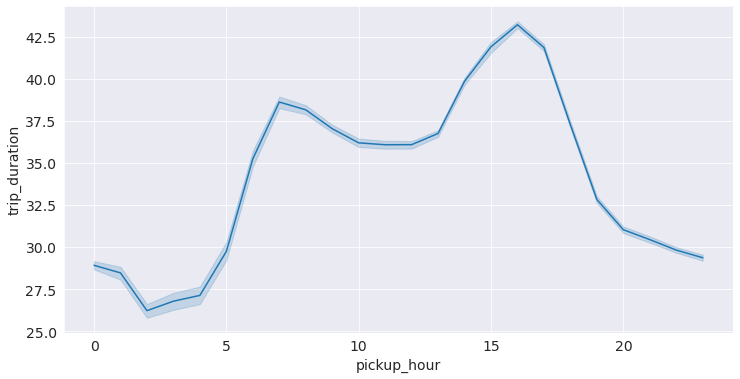

In [42]:
sns.lineplot(x='pickup_hour',y='trip_duration',data=df)


We see that the trip duration is max aroung 1500 hours may be because of the traffic on the city.
And then then duration comes down to around 1800.



*   Let's check what is the trip duration during the day of the week  




In [66]:
weekday_mean = df.groupby(['pickup_days'])[['trip_duration']].mean().reindex(weekdays)


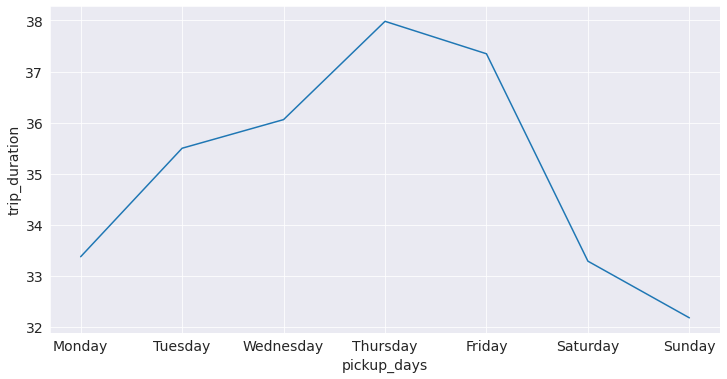

In [65]:
sns.lineplot(x='pickup_days',y='trip_duration',data=weekday_mean)


Trip duration during Thursday is max followed by Firdays.
Maybe more people travelling out as weekend gets closer

Let us save and upload our work to Jovian before continuing.

In [84]:
import jovian

In [85]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/deep3700/course-project-nyc-taxi


'https://jovian.ai/deep3700/course-project-nyc-taxi'

## Inferences and Conclusion

* Only 64% of travel in NYC happens during the day
* There is rise in travell in ***MARCH*** due to more people travelling to NYC to see the St Patricks parade in the City
* While analysing Trip distance, there are some trips made by Taxies with 0 Passengers. There are about 90K trips of the total of 10 million trips about 0.9 %
* Out of 10 million Trips there have been 0.2% of disputes in payment types
*  LaGuardia Airport the most amount of revenue is also Earned from LaGuardia and followed by JFK Airport
* The most of the passengers travel with vendor 2 then followed by vendor 1
* Most of the payment was done form Credit Card and then followed by Cash.
* Most amount of extra charges are 50 cents Standard State Surcharge Plus and $1.00 rush hour surcharge 
* Mean tip amount was higher for passengers greater than 6 about 8.1 to 9.7


In [94]:
import jovian

In [95]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/deep3700/course-project-nyc-taxi


'https://jovian.ai/deep3700/course-project-nyc-taxi'

## References and Future Work

This was the past data we can also consider the current and the all of the pervious year data. 
To predict the people taking taxis and planing more efficiet path so that taxis so that there is a reduce in mean trip distace time.
We also can map the path that each taxi took to complete the trip. This data will also be usefull in many ways like the we can check the relation of trip distace and the distance travelled for each trip.Also, a column mentioning which type of cab there is the trip So, that we can figure out the preference of the passenger.




### Links to resources you found useful.

* https://en.wikipedia.org/wiki/Tourism_in_New_York_City
* https://www1.nyc.gov/site/tlc/about/tlc-initiatives.page
* https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page
* https://www.introducingnewyork.com/taxis

In [96]:
import jovian

In [97]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/deep3700/course-project-nyc-taxi


'https://jovian.ai/deep3700/course-project-nyc-taxi'